## Loading Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading the csv file and displaying the first 5 rows of the dataframe.
products = pd.read_csv(r'Dataset/amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Cleaning the Data

In [4]:
def remove_punctuation(text):
    """
    The function takes in a string, and returns a new string with all of the punctuation removed. 
    
    The function uses Python's built-in string.punctuation variable, which is a string of all the punctuation characters. 
    
    The function str.translate() takes in a translation table, which you can generate using the maketrans() helper function
    in the string library. 
    
    :param text: The text to be processed
    :return: A string with all punctuation removed.
    """
    import string
    return str(text).translate(str.maketrans('', '', string.punctuation)) 

# Applying the remove_punctuation function to the review column of the products dataframe.
products['review_clean'] = products['review'].apply(remove_punctuation)

# Displaying the first 5 rows of the dataframe.
products.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


In [5]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [6]:
# The below code is loading the train and test index files into the train_index and test_index variables.Index files are used to follow the same implementation done in assignment as it's not done on pandas.
import json

temp_file = open('Dataset/module-9-assignment-train-idx.json')
train_index = json.load(temp_file)
temp_file.close()
temp_file = open('Dataset/module-9-assignment-test-idx.json')
test_index = json.load(temp_file)
temp_file.close()

In [7]:
# The above code is splitting the data into training and test data.
train_data = products.iloc[train_index]
test_data = products.iloc[test_index]
# Reseting the index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
# Assigning the sentiment column to the train_target and test_target variables.
train_target = train_data['sentiment']
test_target = test_data['sentiment']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression().fit(train_matrix, train_target)

print ("Test Accuracy: ", metrics.accuracy_score(model.predict(test_matrix),test_target))

Test Accuracy:  0.8836393088552916


In [77]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

## Questions

> Question 1
> 
> Consider the logistic regression model trained on **amazon_baby.sframe** using Turi Create.
> 
> Using accuracy as the evaluation metric, was our **logistic regression model** better than the **majority class classifier**?

In [19]:
print ("Test Accuracy of model: ", metrics.accuracy_score(model.predict(test_matrix),test_target))
majority_class = train_target.value_counts().head(1).index.values[0]
print ("Test Accuracy of majority classifier model: ", metrics.accuracy_score(np.array([majority_class]*len(test_target)),test_target))

Test Accuracy of model:  0.8836393088552916
Test Accuracy of majority classifier model:  0.7642788576913847


> Question 2
> 
> How many predicted values in the **test set** are **false positives**?

In [88]:
metrics.confusion_matrix(test_target, model.predict(test_matrix

array([[ 5468,  2390],
       [ 1489, 23989]], dtype=int64)

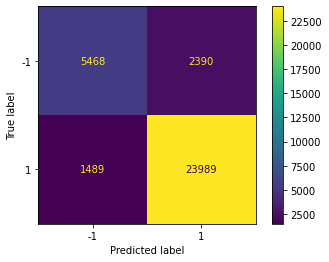

In [24]:
import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(model,test_matrix,test_target)
plt.show()

> Question 3
> 
> Consider the scenario where each false positive costs 100 and each false negative 1.
> 
> Given the stipulation, what is the cost associated with the logistic regression classifier's performance on the **test set**?

In [54]:
cm_mt = metrics.confusion_matrix(model.predict(test_matrix),test_target)
false_positive = cm_mt[1,0]
false_negative = cm_mt[0,1]
100*false_positive+false_negative

240489

> Question 4
> 
> Out of all reviews in the **test set** that are predicted to be positive, what fraction of them are **false positives**? (Round to the second decimal place e.g. 0.25)

In [55]:
false_positive/cm_mt[1].sum()

0.09060237309981424

> Question 6
> 
> What fraction of the positive reviews in the **test_set** were correctly predicted as positive by the classifier? Round your answer to 2 decimal places.

In [56]:
(model.predict(test_matrix[test_target==1])==1).sum() / test_target[test_target==1].sum()

0.941557422089646

> Question 7
> 
> What is the recall value for a classifier that predicts **+1** for all data points in the **test_data**?

In [63]:
metrics.recall_score(test_target,np.array([1.]*len(test_target)))

1.0

> Question 10
> 
> Among all the threshold values tried, what is the **smallest** threshold value that achieves a precision of 96.5% or better? Round your answer to 3 decimal places.

In [126]:
probabilities = model.predict_proba(test_matrix)[:,1]

predictions[predictions==0] = -1

In [82]:
threshold_values = np.linspace(0.5, 1, num=100)
for threshold in threshold_values:
    predictions = (probabilities>threshold).astype(int)
    predictions[predictions==0] = -1
    print("Threshold {} : Precsion {} : Recall {}".format(threshold.round(3), metrics.precision_score(test_target,predictions).round(3), metrics.recall_score(test_target,predictions).round(3)))

Threshold 0.5 : Precsion 0.909 : Recall 0.942
Threshold 0.505 : Precsion 0.91 : Recall 0.941
Threshold 0.51 : Precsion 0.911 : Recall 0.94
Threshold 0.515 : Precsion 0.912 : Recall 0.94
Threshold 0.52 : Precsion 0.913 : Recall 0.939
Threshold 0.525 : Precsion 0.913 : Recall 0.938
Threshold 0.53 : Precsion 0.914 : Recall 0.937
Threshold 0.535 : Precsion 0.915 : Recall 0.936
Threshold 0.54 : Precsion 0.916 : Recall 0.936
Threshold 0.545 : Precsion 0.917 : Recall 0.935
Threshold 0.551 : Precsion 0.918 : Recall 0.934
Threshold 0.556 : Precsion 0.918 : Recall 0.934
Threshold 0.561 : Precsion 0.919 : Recall 0.933
Threshold 0.566 : Precsion 0.92 : Recall 0.931
Threshold 0.571 : Precsion 0.92 : Recall 0.931
Threshold 0.576 : Precsion 0.921 : Recall 0.929
Threshold 0.581 : Precsion 0.922 : Recall 0.928
Threshold 0.586 : Precsion 0.922 : Recall 0.927
Threshold 0.591 : Precsion 0.923 : Recall 0.926
Threshold 0.596 : Precsion 0.924 : Recall 0.925
Threshold 0.601 : Precsion 0.924 : Recall 0.924
Thr

> Question 11
> 
> Using threshold = 0.98, how many **false negatives** do we get on the **test_data**? (**Hint**: You may use the turicreate.evaluation.confusion_matrix function implemented in Turi Create.)

In [127]:
predictions = (probabilities>0.98).astype(int)
predictions[predictions==0] = -1
metrics.confusion_matrix(test_target, predictions)

array([[ 7625,   233],
       [13181, 12297]], dtype=int64)

> Question 12
> 
> Questions 13 and 14 are concerned with the reviews that contain the word **baby**.
> 
> Among all the threshold values tried, what is the **smallest** threshold value that achieves a precision of 96.5% or better for the reviews of data in **baby_reviews**? Round your answer to 3 decimal places.

In [124]:
baby_index = test_data['name'].fillna('').str.lower().apply(lambda x : 1 if 'baby' in x else 0).astype('bool')
baby_reviews = test_data[baby_index]
baby_matrix = vectorizer.transform(baby_reviews['review_clean'])
probabilities = model.predict_proba(baby_matrix)[:,1]
baby_target = baby_reviews['sentiment']
for threshold in threshold_values:
    predictions = (probabilities>threshold).astype(int)
    predictions[predictions==0] = -1
    print("Threshold {} : Precsion {} : Recall {}".format(threshold.round(3), metrics.precision_score(baby_target,predictions).round(3), metrics.recall_score(baby_target,predictions).round(3)))

Threshold 0.5 : Precsion 0.911 : Recall 0.942
Threshold 0.505 : Precsion 0.913 : Recall 0.941
Threshold 0.51 : Precsion 0.914 : Recall 0.94
Threshold 0.515 : Precsion 0.915 : Recall 0.94
Threshold 0.52 : Precsion 0.916 : Recall 0.939
Threshold 0.525 : Precsion 0.916 : Recall 0.937
Threshold 0.53 : Precsion 0.917 : Recall 0.937
Threshold 0.535 : Precsion 0.917 : Recall 0.936
Threshold 0.54 : Precsion 0.918 : Recall 0.936
Threshold 0.545 : Precsion 0.919 : Recall 0.935
Threshold 0.551 : Precsion 0.92 : Recall 0.934
Threshold 0.556 : Precsion 0.921 : Recall 0.934
Threshold 0.561 : Precsion 0.922 : Recall 0.932
Threshold 0.566 : Precsion 0.923 : Recall 0.93
Threshold 0.571 : Precsion 0.923 : Recall 0.93
Threshold 0.576 : Precsion 0.924 : Recall 0.928
Threshold 0.581 : Precsion 0.924 : Recall 0.928
Threshold 0.586 : Precsion 0.925 : Recall 0.927
Threshold 0.591 : Precsion 0.926 : Recall 0.926
Threshold 0.596 : Precsion 0.927 : Recall 0.925
Threshold 0.601 : Precsion 0.927 : Recall 0.923
Thr